In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from seaborn import plt

In [70]:
%matplotlib inline

# What are Cetacea?

## Cetacea are marine mammals commonly known as whales, dolphins, and porpoises.

# Question: At a specific time and location along the Pacific coast, what is the probability of seeing marine mammals?

## Data Source

The data came from a team of Marine Biologists lead by Jay Barlow of NOAA Southwest Fisheries Science Center.

http://seamap.env.duke.edu/dataset/1065

#### Abstract

The 2008 Oregon, California and Washington Line-Transect Experiment (ORCAWALE) was designed to estimate the abundance of and to describe the distribution of dolphins, whales, and porpoises off the west coast of the United States out to 300 nautical miles. This survey was conducted by the NOAA Southwest Fisheries Science Center aboard the NOAA Ship McArthur II for a total of approximately 12,800 kilometers surveyed from late July to the end of November 2008. This dataset provides the time-date and geographical coordinates, by species/stock, of all cetaceans detected during the survey, as well as the daily and intra-daily start and end points of the line-transect survey.

#### Purpose
The primary purpose of this survey was to estimate the abundance of and to describe the distribution of dolphins, whales, and porpoises off the west coast of the United States out to 300 nautical miles.

## Duke University's OBIS-SEAMAP 

Ocean Biogeographic Information System Spatial Ecological Analysis of Megavertebrate Populations, is a spatially referenced online database, aggregating marine mammal, seabird and sea turtle observation data from across the globe. 

http://seamap.env.duke.edu/

##Presence-Only Data Problem

You only have records for what you observe, not what you don't observe.

https://www.dropbox.com/s/vqzxbxcnm28srvi/presence_only_data.pdf?dl=0

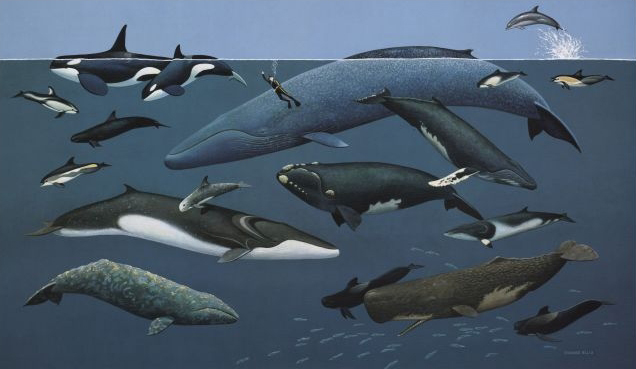

In [69]:
from IPython.display import Image
Image("http://marinemammalconservancy.org/wp-content/uploads/2010/03/species-photo.jpg")

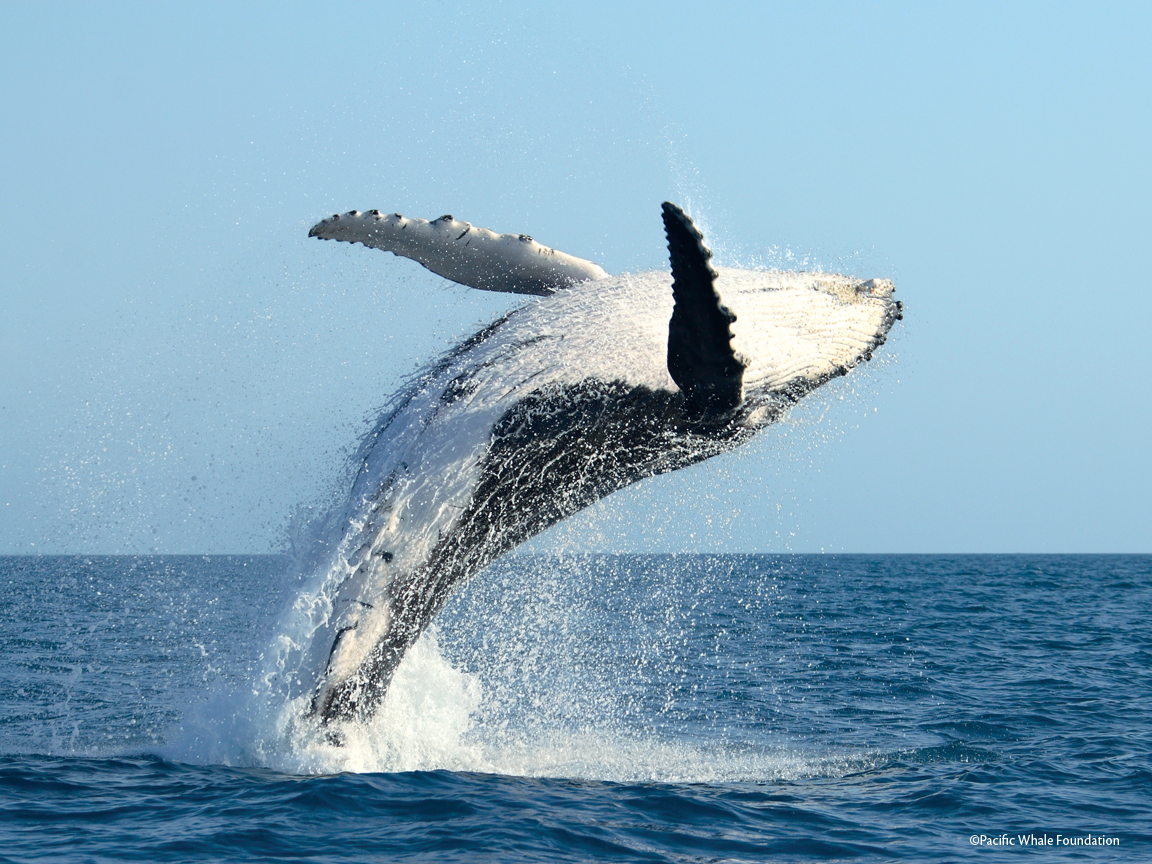

In [68]:
Image("http://mauiwhalefestival.org/sites/mauiwhalefestival.org/files/Press-Whale-4_0.png")

In [7]:
whales08 = pd.read_csv('seamap1065_names_2008.csv', index_col=0)
whales08.head()

,row_id,latitude,longitude,sp_code,scientific,common,tsn,count,series_id,obs_date,date_time,last_mod,provider,owner,oceano,depth,ds_type,platform
dataset_id,,,,,,,,,,,,,,,,,,
1065,1065_18862,37.22,-126.68,MA,Mirounga angustirostris,Northern Elephant Seal,180672,1,NaN,10/20/08,10/20/08 8:56,11/26/13 12:19,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":0.7100,""CHL_M"":0.4900,""CHL_Y"":0.4500,""...",NaN,ptobs,boat
1065,1065_18863,37.22,-126.69,MA,Mirounga angustirostris,Northern Elephant Seal,180672,1,NaN,10/20/08,10/20/08 9:00,11/26/13 12:19,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":0.7100,""CHL_M"":0.4900,""CHL_Y"":0.4500,""...",NaN,ptobs,boat
1065,1065_18864,37.23,-126.74,177,Cetacea,cetaceans,180403,155,NaN,10/20/08,10/20/08 9:16,11/26/13 12:19,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":0.7100,""CHL_M"":0.4900,""CHL_Y"":0.4500,""...",NaN,ptobs,boat
1065,1065_18865,37.24,-126.79,CU,Callorhinus ursinus,Northern Fur Seal,180627,1,NaN,10/20/08,10/20/08 9:30,11/26/13 12:19,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":0.5500,""CHL_M"":0.4200,""CHL_Y"":0.4300,""...",NaN,ptobs,boat
1065,1065_18866,37.28,-126.98,MA,Mirounga angustirostris,Northern Elephant Seal,180672,1,NaN,10/20/08,10/20/08 10:24,11/26/13 12:19,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":0.4600,""CHL_M"":0.4000,""CHL_Y"":0.3900,""...",NaN,ptobs,boat


In [8]:
whales08.describe()

,latitude,longitude,tsn,count,series_id,depth
count,903.000000,903.000000,903.000000,890.000000,0,0
mean,37.612182,-124.217276,184673.595792,34.061798,NaN,NaN
std,4.473932,2.958823,39279.578292,125.403069,NaN,NaN
min,30.280000,-131.000000,180403.000000,1.000000,NaN,NaN
25%,33.970000,-126.070000,180438.000000,1.000000,NaN,NaN
50%,36.970000,-124.550000,180523.000000,2.000000,NaN,NaN
75%,40.815000,-122.295000,180627.000000,10.000000,NaN,NaN
max,48.340000,-117.300000,555654.000000,2056.000000,NaN,NaN


In [9]:
len(whales08)

903

In [10]:
common08 = whales08['common'].unique()
print common08

['Northern Elephant Seal' 'cetaceans' 'Northern Fur Seal' 'baleen whales'
 'goose-beaked whales' 'eared seals' 'Short-beaked Common Dolphin'
 'Striped Dolphin' 'Blue Whale' "Risso's Dolphin" "Dall's Porpoise"
 'Fin Whale' "Baird's Beaked Whale" 'Northern Right Whale Dolphin'
 "Cuvier's Beaked Whale" 'Sei Whale' 'Sperm Whale'
 'Pacific White-sided Dolphin' 'Killer Whale' 'pygmy sperm whales'
 'Humpback Whale' 'Harbor Porpoise' 'California Sealion'
 'Bottlenose Dolphin' 'common dolphins' 'Long-beaked Common Dolphin'
 'Short-finned Pilot Whale' 'Common Minke Whale' 'beaked whales']


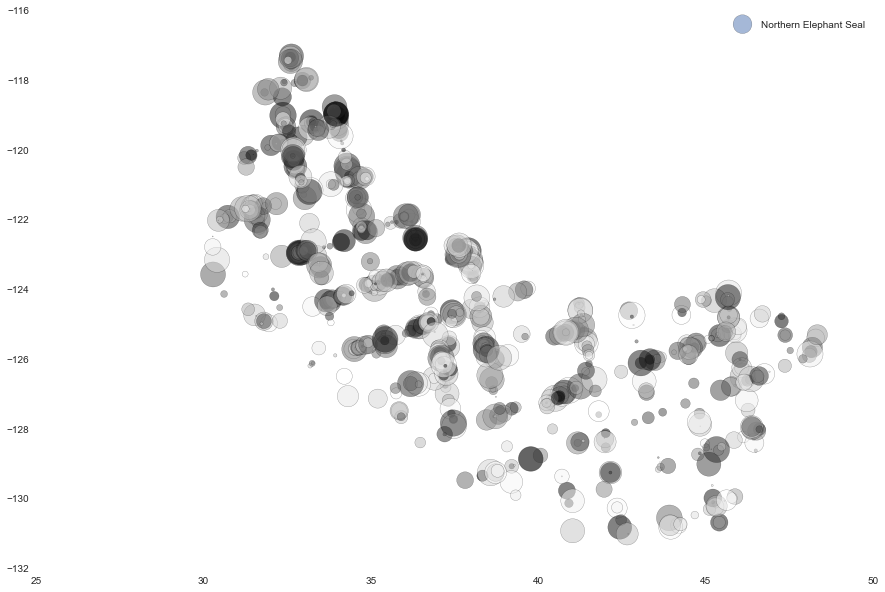

In [62]:
# playing around with scatterplots
N = len(whales08)
x = whales08.latitude
y = whales08.longitude
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2 # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.legend(common08)

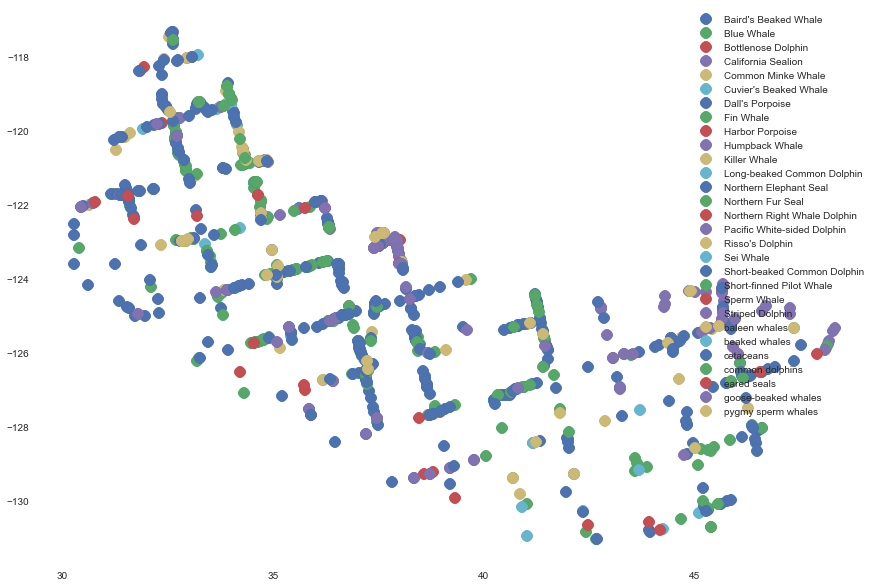

In [12]:
# num = len(whales08['common']) .. len() function not working
num = len(whales08)
x = whales08.latitude
y = whales08.longitude
labels = whales08.common
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')
sns.set_context(rc={"figure.figsize": (15, 10)})


fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
plt.legend(ax.get_legend_handles_labels()[1], loc="center")
ax.legend()

plt.show()


In [13]:
ax.plot?

### KNN Learning from Whale Cruise in 2008

In [14]:
#edited dataframe

whales08_clean = whales08[['latitude', 'longitude', 'common']]
whales08_clean.head()

,latitude,longitude,common
dataset_id,,,
1065,37.22,-126.68,Northern Elephant Seal
1065,37.22,-126.69,Northern Elephant Seal
1065,37.23,-126.74,cetaceans
1065,37.24,-126.79,Northern Fur Seal
1065,37.28,-126.98,Northern Elephant Seal


In [15]:
whales08_clean.describe()

,latitude,longitude
count,903.000000,903.000000
mean,37.612182,-124.217276
std,4.473932,2.958823
min,30.280000,-131.000000
25%,33.970000,-126.070000
50%,36.970000,-124.550000
75%,40.815000,-122.295000
max,48.340000,-117.300000


In [16]:
feature_cols = [col for col in whales08_clean.columns if col != 'common']
print feature_cols

['latitude', 'longitude']


In [17]:
X = whales08_clean[feature_cols]

In [18]:
y = whales08_clean['common']

In [19]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [21]:
# wow, you can't predict seeing whales just by
# the location you saw them before
score = clf.score(X_test, y_test)
comment1 = 'well, this is not a very accurate model'
print score
print comment1

0.30258302583
well, this is not a very accurate model


### Whales Sightings from 2008 Marine Biology Cruise in Gmaps

In [22]:
import gmaps as gm

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

In [23]:
data = whales08_clean[['latitude','longitude']]

In [24]:
len(whales08_clean)

903

In [25]:
whales08_clean['latitude'].iloc[9]

34.490000000000002

In [26]:
result08 = []
latlong = []
for i in range(0, 903):
    latlong = [whales08_clean['latitude'].iloc[i], whales08_clean['longitude'].iloc[i]]
    result08.append(latlong)

In [27]:
gm.heatmap(result08)


# KNN Learning from Cetacea Cruise in 2001

In [28]:
whales01a = pd.read_csv('seamap1047_names_2001.csv', index_col=0)
whales01b = pd.read_csv('seamap1049_names_2001.csv', index_col=0)

In [29]:
whales01a.head()

,row_id,latitude,longitude,sp_code,scientific,common,tsn,count,series_id,obs_date,date_time,last_mod,provider,owner,oceano,depth,ds_type,platform
dataset_id,,,,,,,,,,,,,,,,,,
1047,1047_8718,35.65,-127.07,077,Cetacea,cetaceans,180403,NaN,NaN,2001-08-03,2001-08-03 18:17:16,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":0.1100,""CHL_M"":0.1100,""CHL_Y"":0.2100,""...",NaN,ptobs,boat
1047,1047_8714,35.29,-127.17,077,Cetacea,cetaceans,180403,NaN,NaN,2001-08-03,2001-08-03 15:35:47,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.1900,""CHL_Y"":0.2000,""S...",NaN,ptobs,boat
1047,1047_9010,37.19,-126.61,017,Delphinus delphis,Short-beaked Common Dolphin,180438,41,NaN,2001-10-14,2001-10-14 07:46:45,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.3500,""CHL_Y"":0.3500,""S...",NaN,ptobs,boat
1047,1047_8726,37.09,-126.57,074,Balaenoptera physalus,Fin Whale,180527,3,NaN,2001-08-04,2001-08-04 20:00:54,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.4100,""CHL_Y"":0.3500,""S...",NaN,ptobs,boat
1047,1047_8724,36.88,-126.61,074,Balaenoptera physalus,Fin Whale,180527,6,NaN,2001-08-04,2001-08-04 18:36:55,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.3700,""CHL_Y"":0.3200,""S...",NaN,ptobs,boat


In [30]:
whales01b.head()

,row_id,latitude,longitude,sp_code,scientific,common,tsn,count,series_id,obs_date,date_time,last_mod,provider,owner,oceano,depth,ds_type,platform
dataset_id,,,,,,,,,,,,,,,,,,
1049,1049_9143,32.18,-124.37,013,Stenella coeruleoalba,Striped Dolphin,180434,18,NaN,2001-11-19,2001-11-19 13:40:13,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.1800,""CHL_Y"":0.1600,""S...",NaN,ptobs,boat
1049,1049_9145,32.12,-123.99,078,Cetacea,cetaceans,180403,1,NaN,2001-11-19,2001-11-19 15:38:01,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.1300,""CHL_Y"":0.1500,""S...",NaN,ptobs,boat
1049,1049_9146,32.10,-123.94,017,Delphinus delphis,Short-beaked Common Dolphin,180438,30,NaN,2001-11-19,2001-11-19 15:53:19,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.1300,""CHL_Y"":0.1500,""S...",NaN,ptobs,boat
1049,1049_9147,32.05,-123.92,017,Delphinus delphis,Short-beaked Common Dolphin,180438,10,NaN,2001-11-19,2001-11-19 16:11:49,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.1500,""CHL_Y"":0.1500,""S...",NaN,ptobs,boat
1049,1049_9148,32.01,-123.89,017,Delphinus delphis,Short-beaked Common Dolphin,180438,162,NaN,2001-11-19,2001-11-19 16:35:44,2013-11-26 12:19:27,NOAA Southwest Fisheries Science Center (SWFSC),Tim.Gerrodette,"""CHL_D"":-9999,""CHL_M"":0.1500,""CHL_Y"":0.1500,""S...",NaN,ptobs,boat


In [31]:
whales01a.describe()

,latitude,longitude,tsn,count,series_id,depth
count,441.000000,441.000000,441.000000,435.000000,0,0
mean,40.579728,-125.131088,181688.990930,24.979310,NaN,NaN
std,4.622466,2.974953,26699.529621,91.469604,NaN,NaN
min,31.850000,-130.970000,0.000000,1.000000,NaN,NaN
25%,35.950000,-127.290000,180438.000000,1.500000,NaN,NaN
50%,41.280000,-125.260000,180473.000000,3.000000,NaN,NaN
75%,43.850000,-124.390000,180488.000000,10.000000,NaN,NaN
max,47.720000,-117.870000,555654.000000,1155.000000,NaN,NaN


In [32]:
whales01b.describe()

,latitude,longitude,tsn,count,series_id,depth
count,97.000000,97.000000,97.000000,96.000000,0,0
mean,34.325464,-122.517629,180407.927835,44.520833,NaN,NaN
std,2.132913,2.436809,676.588490,209.031651,NaN,NaN
min,30.300000,-126.490000,173828.000000,1.000000,NaN,NaN
25%,32.330000,-124.320000,180438.000000,1.750000,NaN,NaN
50%,33.900000,-122.310000,180480.000000,3.000000,NaN,NaN
75%,36.490000,-120.850000,180527.000000,12.500000,NaN,NaN
max,37.940000,-118.080000,180621.000000,1926.000000,NaN,NaN


# Does the KNN prediction improve for data from 2001?

In [33]:
common01 = whales01a['common'].unique()
print common01

['cetaceans' 'Short-beaked Common Dolphin' 'Fin Whale' 'Blue Whale'
 "Risso's Dolphin" 'Sperm Whale' 'Northern Right Whale Dolphin'
 'Striped Dolphin' "Dall's Porpoise" "Baird's Beaked Whale"
 'Pacific White-sided Dolphin' 'Killer Whale' 'baleen whales'
 'goose-beaked whales' 'Sei Whale' "Cuvier's Beaked Whale"
 'Harbor Porpoise' 'Humpback Whale' nan 'Northern Fur Seal'
 'Bottlenose Dolphin' 'Long-beaked Common Dolphin' 'common dolphins'
 'pygmy sperm whales' 'Gray Whale' 'Common Minke Whale' 'Leatherback'
 'Sea Turtles']


In [34]:
whales01a_clean = whales01a[['latitude','longitude', 'common']]
whales01a_clean.describe()

,latitude,longitude
count,441.000000,441.000000
mean,40.579728,-125.131088
std,4.622466,2.974953
min,31.850000,-130.970000
25%,35.950000,-127.290000
50%,41.280000,-125.260000
75%,43.850000,-124.390000
max,47.720000,-117.870000


In [35]:
feature_cols2 = [col for col in whales01a_clean.columns if col != 'common']
print feature_cols2

['latitude', 'longitude']


In [36]:
X = whales01a_clean[feature_cols]
y = whales01a_clean['common']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
clf2 = neighbors.KNeighborsClassifier(3, weights='uniform')
clf2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [39]:
score2 = clf2.score(X_test, y_test)
comment = 'a little bit better than 08, but pretty terrible accuracy nonetheless!'
print score2
print comment

0.360902255639
a little bit better than 08, but pretty terrible accuracy nonetheless!


# Cetacea Sightings from 2001 cruise in Google heatmaps

In [40]:
data2 = whales01a_clean[['latitude','longitude']]

In [41]:
results01a = []
latlong01a = []
for i in range(len(whales01a_clean)):
    latlong01a = [whales01a_clean['latitude'].iloc[i], whales01a_clean['longitude'].iloc[i]]
    results01a.append(latlong01a)

In [42]:
gm.heatmap(results01a)

In [43]:
whales01b_clean = whales01b[['latitude','longitude', 'common']]

In [44]:
whales01b_clean.describe()

,latitude,longitude
count,97.000000,97.000000
mean,34.325464,-122.517629
std,2.132913,2.436809
min,30.300000,-126.490000
25%,32.330000,-124.320000
50%,33.900000,-122.310000
75%,36.490000,-120.850000
max,37.940000,-118.080000


# Finally, let's go through these exercises for the data from 1996

## KNN Learning for Cetacea Cruise in 1996

In [45]:
whales96 = pd.read_csv('seamap219_names_1996.csv', index_col=0)

In [46]:
whales96.describe()

,latitude,longitude,tsn,count,series_id,depth
count,987.000000,987.000000,986.000000,986.000000,0,0
mean,38.930811,-123.776302,199373.271805,25.308316,NaN,NaN
std,4.249801,2.553119,81659.312218,114.687987,NaN,NaN
min,31.800000,-130.910000,173828.000000,1.000000,NaN,NaN
25%,35.560000,-125.430000,180473.000000,1.000000,NaN,NaN
50%,37.950000,-124.430000,180497.000000,2.000000,NaN,NaN
75%,42.610000,-122.010000,180621.000000,5.000000,NaN,NaN
max,48.000000,-117.300000,555654.000000,1870.000000,NaN,NaN


In [47]:
whales96.head()

,row_id,latitude,longitude,sp_code,scientific,common,tsn,count,series_id,date_time,last_mod,provider,owner,oceano,depth,ds_type
dataset_id,,,,,,,,,,,,,,,,
219,219_310,32.95,-117.30,California sea lion,Zalophus californianus,California sea lion,180621,1,NaN,8/20/96 10:49,10/3/05 18:08,NOAA Southwest Fisheries Science Center (SWFSC),jay.barlow,"""SSH_D"":-9999,""SST_D"":-9999,""SST_M"":-9999,""SST...",NaN,ptobs
219,219_311,32.96,-117.30,California sea lion,Zalophus californianus,California sea lion,180621,1,NaN,8/20/96 10:52,10/3/05 18:08,NOAA Southwest Fisheries Science Center (SWFSC),jay.barlow,"""SSH_D"":-9999,""SST_D"":-9999,""SST_M"":-9999,""SST...",NaN,ptobs
219,219_312,32.97,-117.30,"Unidentified common dolphin, saddleback dolphi...",Delphinus,common dolphins,180437,225,NaN,8/20/96 10:57,10/3/05 18:08,NOAA Southwest Fisheries Science Center (SWFSC),jay.barlow,"""SSH_D"":-9999,""SST_D"":-9999,""SST_M"":-9999,""SST...",NaN,ptobs
219,219_962,32.59,-117.97,Northern elephant seal,Mirounga angustirostris,northern elephant seal,180672,1,NaN,10/14/96 12:51,10/3/05 18:08,NOAA Southwest Fisheries Science Center (SWFSC),jay.barlow,"""SSH_D"":57.77,""SST_D"":18.975,""SST_M"":18.225,""S...",NaN,ptobs
219,219_965,32.65,-117.86,Blue whale,Balaenoptera musculus,blue whale,180528,1,NaN,10/14/96 13:36,10/3/05 18:08,NOAA Southwest Fisheries Science Center (SWFSC),jay.barlow,"""SSH_D"":53.84,""SST_D"":19.125,""SST_M"":18.150,""S...",NaN,ptobs


In [48]:
whales96_clean = whales96[['latitude','longitude','common']]
whales96_clean.head()

,latitude,longitude,common
dataset_id,,,
219,32.95,-117.30,California sea lion
219,32.96,-117.30,California sea lion
219,32.97,-117.30,common dolphins
219,32.59,-117.97,northern elephant seal
219,32.65,-117.86,blue whale


In [49]:
feature_cols3 = [col for col in whales96_clean.columns if col != 'common']
print feature_cols3

['latitude', 'longitude']


In [50]:
X = whales96_clean[feature_cols]
y = whales96_clean['common']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
clf3 = neighbors.KNeighborsClassifier(3, weights='uniform')
clf3.fit(X_train, y_train)

/Users/isabel/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:197: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [53]:
score3 = clf3.score(X_test, y_test)
comment3 = 'around the same accuracy level as the others. still not great'
print score3
print comment3

0.356902356902
around the same accuracy level as the others. still not great


/Users/isabel/anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1304: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  score = y_true == y_pred


## And another Google heatmap

In [54]:
results96 = []
latlong96 = []
for i in range(len(whales96)):
    latlong96 = [whales96_clean['latitude'].iloc[i], whales96_clean['longitude'].iloc[i]]
    results96.append(latlong96)

In [55]:
gm.heatmap(results96)

# Let's look at the heatmaps side-by-side see if we can make some qualitative inferences

# 2008 

In [56]:
gm.heatmap(result08)


# 2001

In [57]:
gm.heatmap(results01a)


# 1996

In [58]:
gm.heatmap(results96)

# What's next?

## Further areas of exploration:

###1. Use species labels to work on a classificaiton problem.
###2. Build a model on combined datasets from similar seasons but different years. See if accuracy score improves. 
###3. Find weather and ocean data to improve predictions.
###4. Go whale watching.

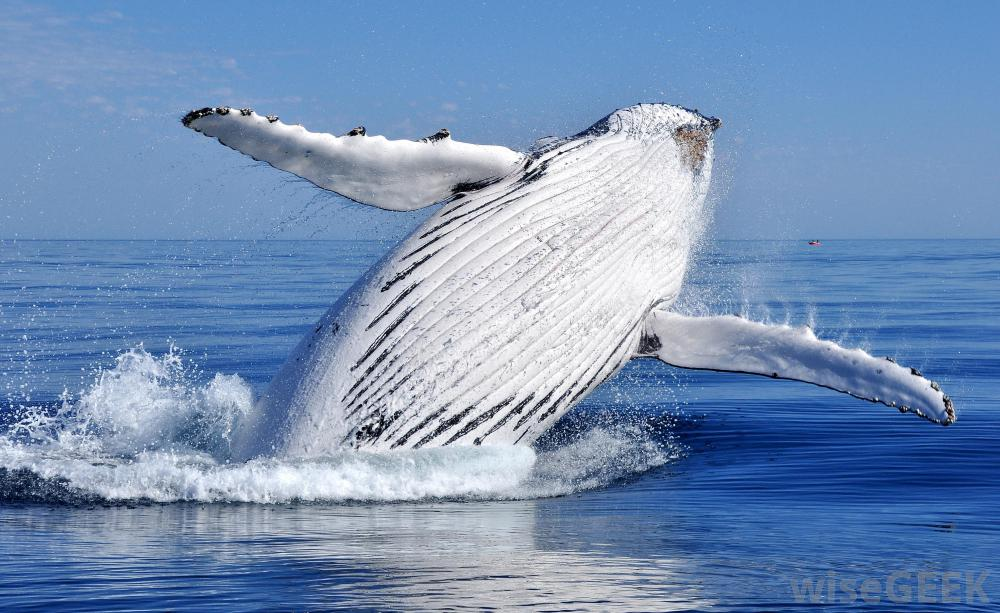

In [59]:
Image("http://images.wisegeek.com/humpback-whale-breaching.jpg")

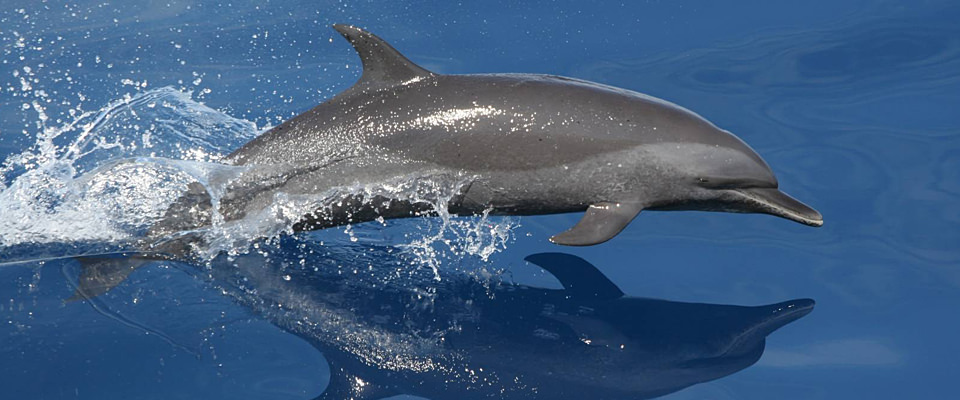

In [60]:
Image("http://oceanservice.noaa.gov/facts/dolphin.jpg")

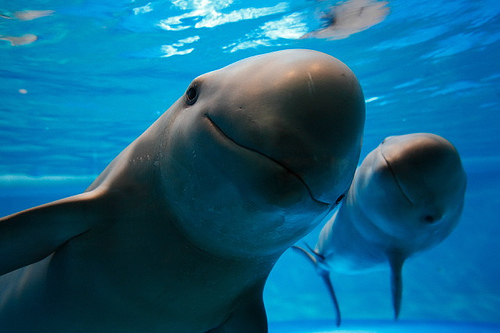

In [61]:
Image("http://farm2.static.flickr.com/1158/1427487029_8d1eda4805.jpg")

##  2005

In [64]:
whales05 = pd.read_csv('seamap1055_2005a.csv', index_col=0)

In [65]:
whales05.describe()

,latitude,longitude,tsn,count,series_id,depth
count,1152.000000,1152.000000,1152.000000,1143.000000,0,0
mean,41.054826,-123.560356,186001.297743,7.903762,NaN,NaN
std,5.383471,1.549385,44850.051379,34.060771,NaN,NaN
min,35.550000,-126.410000,173843.000000,1.000000,NaN,NaN
25%,36.457500,-125.092500,180473.000000,1.000000,NaN,NaN
50%,37.820000,-123.060000,180530.000000,1.000000,NaN,NaN
75%,47.930000,-122.150000,180621.000000,3.000000,NaN,NaN
max,48.620000,-121.260000,552303.000000,475.000000,NaN,NaN


In [66]:
results05 = []
latlong05 = []
for i in range(len(whales05)):
    latlong05 = [whales05['latitude'].iloc[i], whales05['longitude'].iloc[i]]
    results05.append(latlong05)

In [67]:
gm.heatmap(results05)